## Agglomerative Clustering 


### Authors
 Ndèye Gagnessiry Ndiaye and Christin Seifert  

### License
This work is licensed under the Creative Commons Attribution 3.0 Unported License https://creativecommons.org/licenses/by/3.0/ 

This notebook:

- introduces Agglomerative Clustering using features from the Iris flower dataset 

In [37]:
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering


In [39]:
iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth'] 

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

iris = x[['SepalLength', 'PetalLength']]

We fit the hierarchical clustering on the data with n_clusters=3 and considering two attributes of the iris dataset ( e.g SepalLength and PetalLength).

In [42]:
model =AgglomerativeClustering(n_clusters=3)
model

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x104af7a60>)

In [43]:
model.fit(iris)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The following figure plots the model. It shows three clusters of points (red, green, and black) based on a hierarchy. 

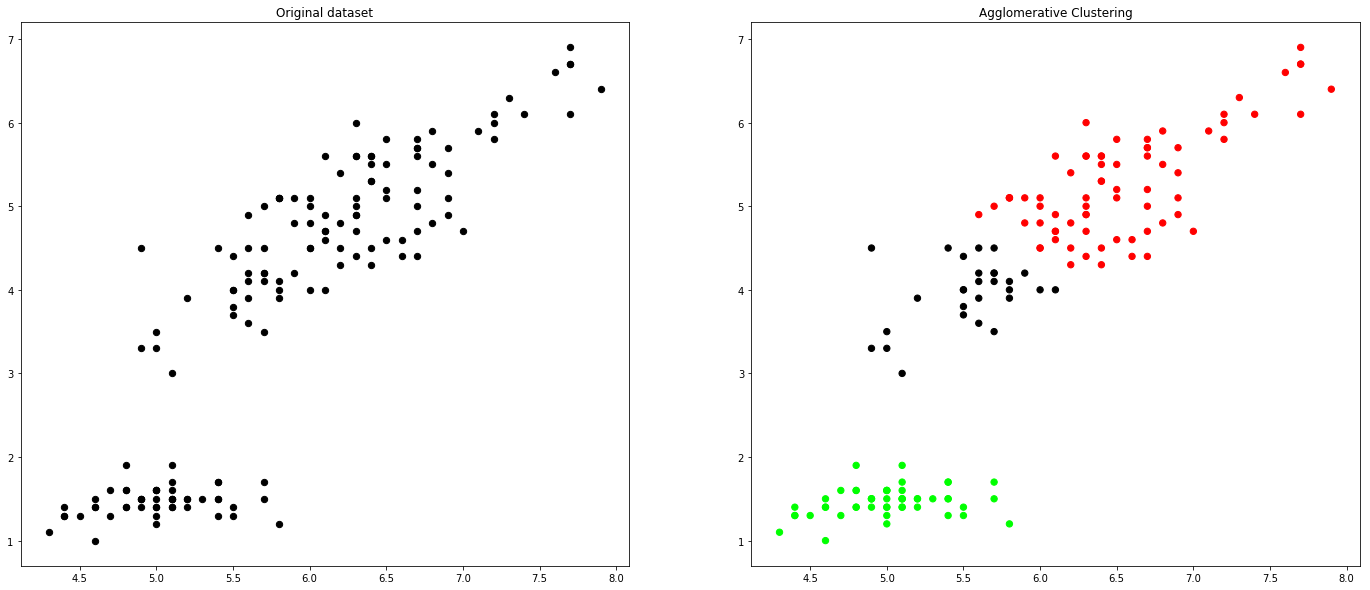

In [44]:
# Set the size of the plot
plt.figure(figsize=(24,10))

# Create a colormap
colormap = np.array(['red', 'lime', 'black'])

# Plot Original
plt.subplot(1, 2, 1)
plt.scatter(x.SepalLength, x.PetalLength, c="K", s=40)
plt.title('Original dataset')

# Plot the Model

plt.subplot(1, 2, 2)
plt.scatter(x.SepalLength, x.PetalLength, c=colormap[model.labels_], s=40)
plt.title('Agglomerative Clustering')


plt.show()

We compute the confusion matrix and calculate the purity metric.

In [45]:
def confusion(y,labels):
    cm = sm.confusion_matrix(y, labels)
    return cm

In [46]:
confusion(y, model.labels_)

array([[ 0, 50,  0],
       [23,  0, 27],
       [49,  0,  1]])

In [47]:
# Calculate purity 
def Purity(cm):
    M=[]
    S=0
    for i in cm:
        k = max(i)
        M.append(k)
    for i in M:
        S+=i
    Purity=S/150 
    return Purity


In [48]:
Purity(confusion(y, model.labels_))

0.83999999999999997